In [8]:
#import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#load dataset
df = pd.read_csv("mbti_onehot_only.csv")


In [ ]:
# simple basic overview
print("Shape:", df.shape)
print("\nMissing values per column:\n", df.isnull().sum())
print("\nUnique MBTI Types:", df['type'].nunique())
print("\nFirst few rows:")
display(df.head())

/var/folders/74/r1637r7d1p9g_89jm6l0dns4wl04rc/T/ipykernel_39953/3539258156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type', data=df, order=df['type'].value_counts().index, palette='crest')


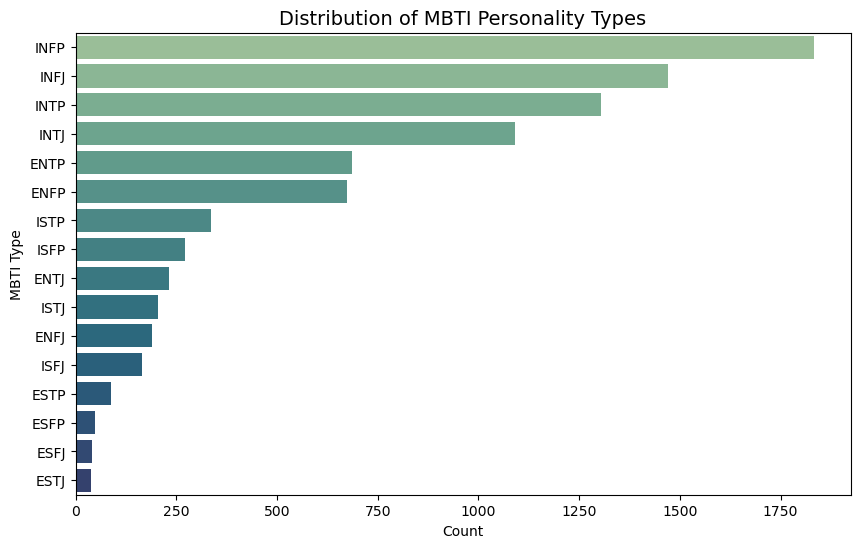


MBTI Type Distribution (%):
 type
INFP    21.12
INFJ    16.95
INTP    15.03
INTJ    12.58
ENTP     7.90
ENFP     7.78
ISTP     3.88
ISFP     3.12
ENTJ     2.66
ISTJ     2.36
ENFJ     2.19
ISFJ     1.91
ESTP     1.03
ESFP     0.55
ESFJ     0.48
ESTJ     0.45
Name: proportion, dtype: float64


In [9]:
#  MBTI type distribution 
plt.figure(figsize=(10,6))
sns.countplot(y='type', data=df, order=df['type'].value_counts().index, palette='crest')
plt.title("Distribution of MBTI Personality Types", fontsize=14)
plt.xlabel("Count")
plt.ylabel("MBTI Type")
plt.show()

# Display % distribution
type_dist = (df['type'].value_counts(normalize=True) * 100).round(2)
print("\nMBTI Type Distribution (%):\n", type_dist)

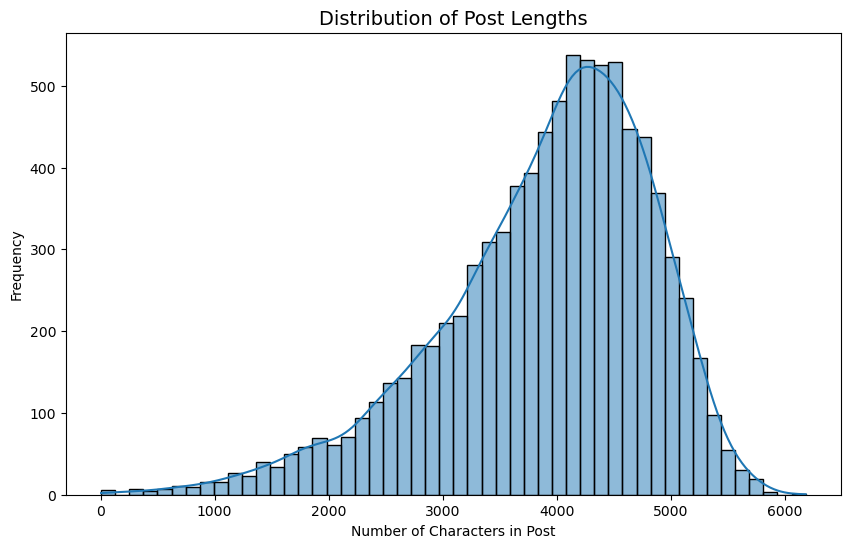

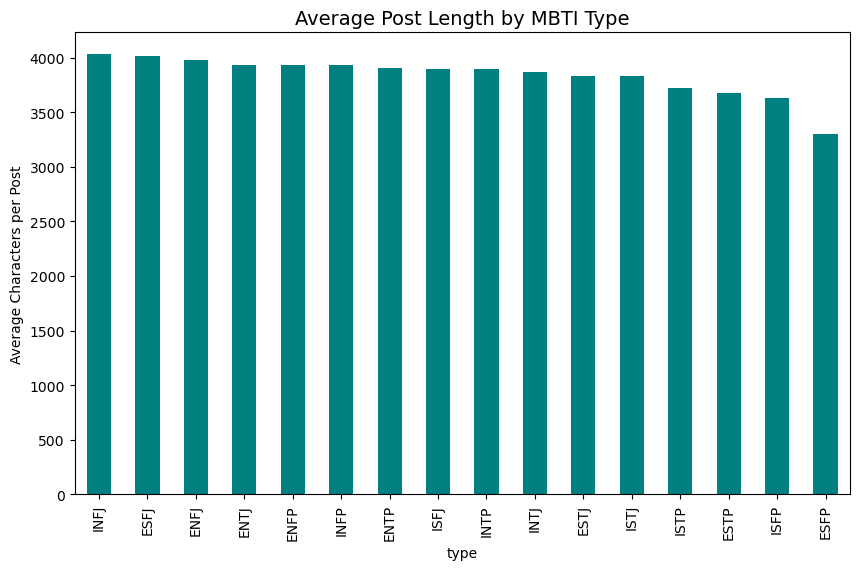


Average Post Length by MBTI Type:
 type
INFJ    4029.460544
ESFJ    4017.166667
ENFJ    3981.594737
ENTJ    3934.731602
ENFP    3933.880000
INFP    3929.115175
ENTP    3902.268613
ISFJ    3900.445783
INTP    3895.292178
INTJ    3870.604950
ESTJ    3835.435897
ISTJ    3833.800000
ISTP    3720.142433
ESTP    3678.910112
ISFP    3626.837638
ESFP    3302.833333
Name: post_length, dtype: float64


In [10]:
#average Post Length Analysis

df['post_length'] = df['cleaned_text'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['post_length'], bins=50, kde=True)
plt.title("Distribution of Post Lengths", fontsize=14)
plt.xlabel("Number of Characters in Post")
plt.ylabel("Frequency")
plt.show()

avg_length = df.groupby("type")["post_length"].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg_length.plot(kind="bar", color="teal")
plt.title("Average Post Length by MBTI Type", fontsize=14)
plt.ylabel("Average Characters per Post")
plt.show()

print("\nAverage Post Length by MBTI Type:\n", avg_length)

/var/folders/74/r1637r7d1p9g_89jm6l0dns4wl04rc/T/ipykernel_39953/3292813549.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=word_freq, x="count", y="word", palette="viridis")


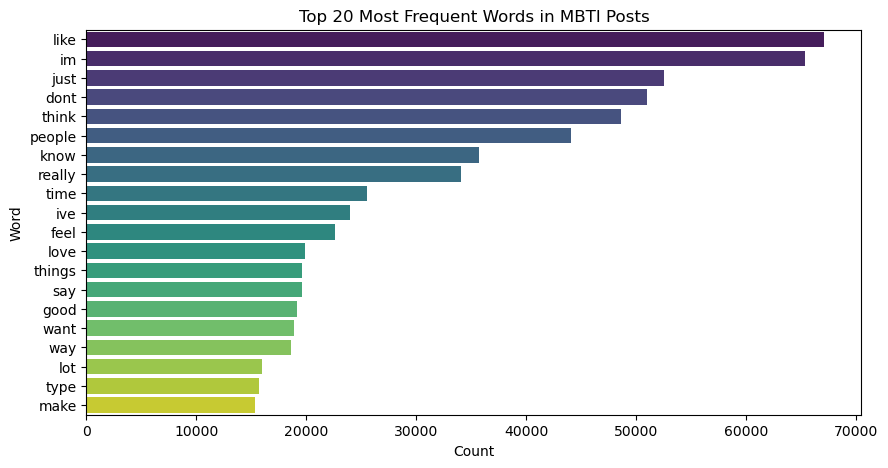

In [12]:
#Word Frequency Patterns top 20 most frequent words

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df["cleaned_text"])
word_freq = pd.DataFrame({
    "word": vectorizer.get_feature_names_out(),
    "count": np.ravel(X.sum(axis=0))
}).sort_values("count", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=word_freq, x="count", y="word", palette="viridis")
plt.title("Top 20 Most Frequent Words in MBTI Posts")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


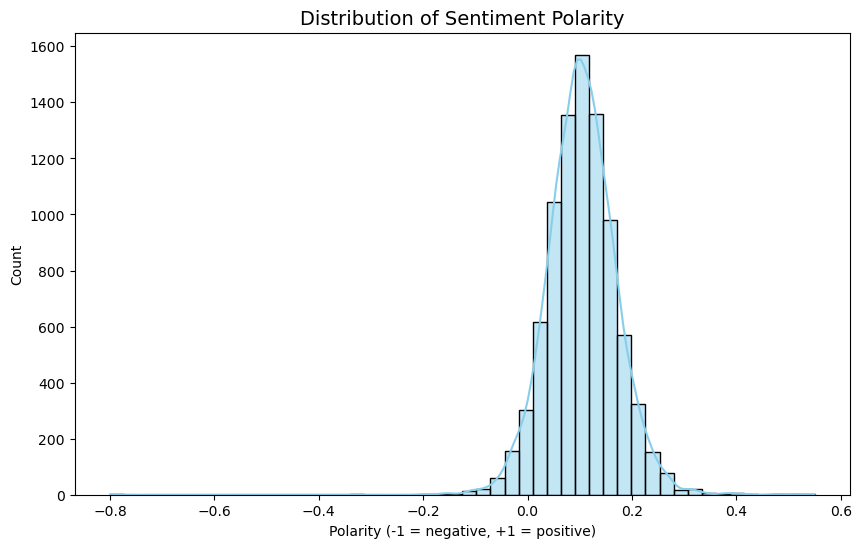

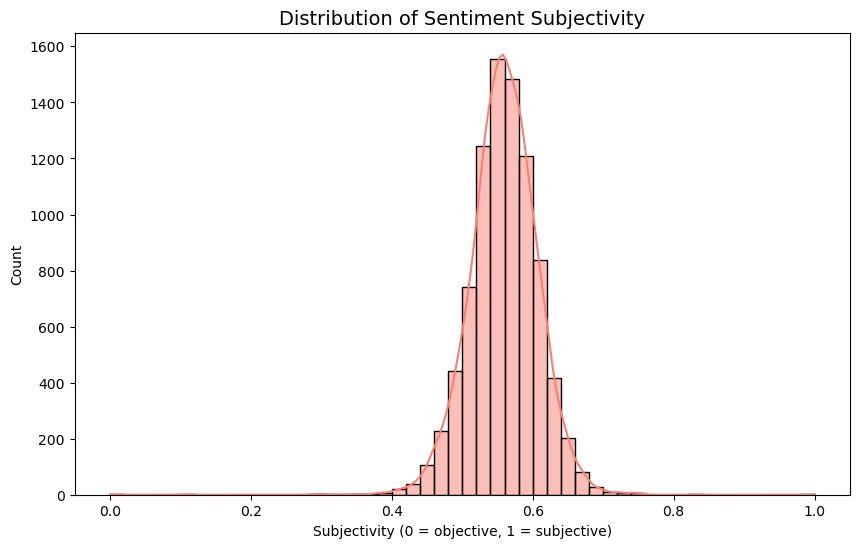


Average Sentiment by MBTI Type:
       polarity  subjectivity
type                        
ENFJ  0.137003      0.571882
ENFP  0.126377      0.573764
ESFJ  0.126181      0.563370
ISFP  0.122970      0.564401
ISFJ  0.116124      0.569156
INFJ  0.113944      0.560792
INFP  0.108660      0.565271
ESTJ  0.103188      0.550249
ESTP  0.102042      0.558841
ENTJ  0.101931      0.557136
ISTJ  0.101600      0.546683
ENTP  0.098043      0.560528
INTJ  0.092791      0.548281
ESFP  0.090602      0.564541
ISTP  0.088136      0.551918
INTP  0.085348      0.549302


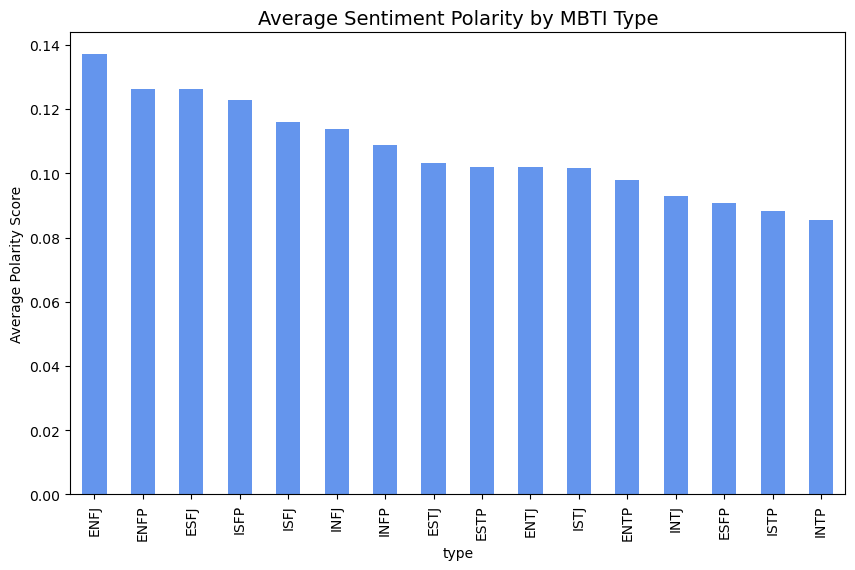


--- EDA Summary ---
Dataset size: 8675 posts
Number of MBTI types: 16
Most common type: INFP
Least common type: ESTJ
Average post length overall: 3906.84
Most frequent words include: like, im, just, dont, think


In [19]:
#Sentiment Trends (Polarity & Subjectivity)

from textblob import TextBlob
from textblob import download_corpora


# Compute sentiment scores
df['polarity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Visualize sentiment distributions
plt.figure(figsize=(10,6))
sns.histplot(df['polarity'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Sentiment Polarity", fontsize=14)
plt.xlabel("Polarity (-1 = negative, +1 = positive)")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['subjectivity'], bins=50, kde=True, color='salmon')
plt.title("Distribution of Sentiment Subjectivity", fontsize=14)
plt.xlabel("Subjectivity (0 = objective, 1 = subjective)")
plt.show()

# Average sentiment by MBTI type
avg_sentiment = df.groupby("type")[["polarity", "subjectivity"]].mean().sort_values("polarity", ascending=False)
print("\nAverage Sentiment by MBTI Type:\n", avg_sentiment)

plt.figure(figsize=(10,6))
avg_sentiment['polarity'].plot(kind='bar', color='cornflowerblue')
plt.title("Average Sentiment Polarity by MBTI Type", fontsize=14)
plt.ylabel("Average Polarity Score")
plt.show()

#Summary 

print("\n--- EDA Summary ---")
print(f"Dataset size: {df.shape[0]} posts")
print(f"Number of MBTI types: {df['type'].nunique()}")
print("Most common type:", df['type'].value_counts().idxmax())
print("Least common type:", df['type'].value_counts().idxmin())
print("Average post length overall:", round(df['post_length'].mean(), 2))
print("Most frequent words include:", ', '.join(word_freq['word'].head(5)))
